In [18]:
%run src/plot.py

C:\Users\user\Desktop\CS 506\FinalProject\src\plot.py:62: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [1]:
import sys
sys.path.append("src")   # ✅ add src folder to import path

from utils import extract_daily_max_dict, plot_daily_max, plot_peak_time_with_weekends, prepare_features
from utils import fit_and_plot_regression, prepare_all_points, predict_player_count

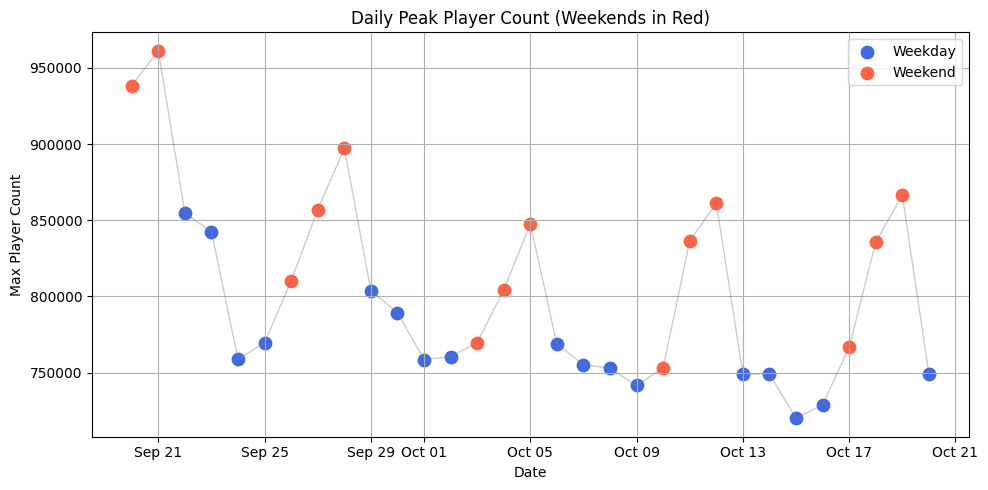

In [2]:
peaks = extract_daily_max_dict("data/Dota 2.csv")
plot_daily_max(peaks, "data/weekend.csv")

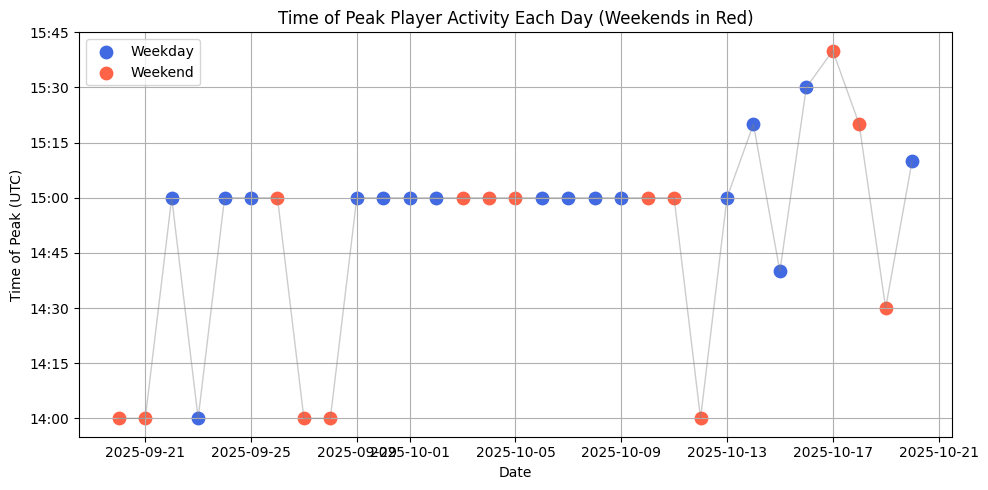

In [3]:
plot_peak_time_with_weekends(peaks, "data/weekend.csv")

In [4]:
import pandas as pd
daily_df = pd.DataFrame([
    {"game_name": "Dota 2", "date": pd.to_datetime(f"2025-{k}"), "max_count": v[1]}
    for k, v in peaks.items()
])
features_df = prepare_features(
    daily_df,
    weekend_csv="data/weekend.csv",
    game_csv="data/Game.csv"
)
features_df.head()

,game_name,date,max_count,is_weekend,price_usd,days_since_release,day_index,day_of_week,dow_sin,dow_cos
0,Dota 2,2025-09-20,938429,1,0.0,4456,0,5,-0.974928,-0.222521
1,Dota 2,2025-09-21,961289,1,0.0,4457,1,6,-0.781831,0.623490
2,Dota 2,2025-09-22,854719,0,0.0,4458,2,0,0.000000,1.000000
3,Dota 2,2025-09-23,842420,0,0.0,4459,3,1,0.781831,0.623490
4,Dota 2,2025-09-24,758847,0,0.0,4460,4,2,0.974928,-0.222521


Linear Regression Coefficients:
---------------------------------
is_weekend               : -9488.8588
price_usd                : -0.0000
days_since_release       : -1568.1123
day_index                : -1568.1123
day_of_week              : 17072.3421
dow_sin                  : -27571.8623
dow_cos                  : 41449.3536

Intercept: 7784889.3772

R² (on training data): 0.883


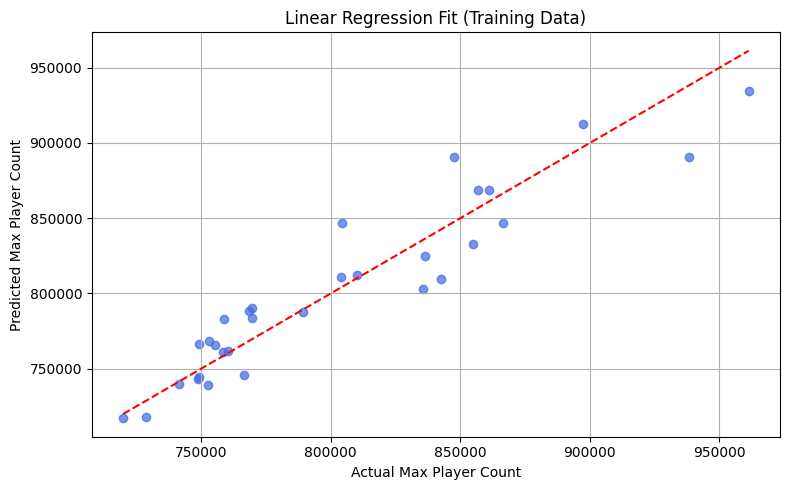

In [6]:
model = fit_and_plot_regression(features_df)

In [7]:

game_files = ["data/Dota 2.csv"]
df_game = prepare_all_points(
    game_files,
    weekend_csv="data/weekend.csv",
    game_csv="data/game.csv"
)
print(df_game.head())
print(f"Total data points: {len(df_game):,}")

Combined 1,588 total data points from 1 file(s).
        date      time  players            datetime game_name  is_weekend  \
0 2025-09-20  01:00:00   455434 2025-09-20 01:00:00    Dota 2           1   
1 2025-09-20  02:00:00   479434 2025-09-20 02:00:00    Dota 2           1   
2 2025-09-20  03:00:00   489015 2025-09-20 03:00:00    Dota 2           1   
3 2025-09-20  04:00:00   490607 2025-09-20 04:00:00    Dota 2           1   
4 2025-09-20  05:00:00   515127 2025-09-20 05:00:00    Dota 2           1   

   price_usd release_date  days_since_release  hour  day_of_week   dow_sin  \
0        0.0   2013-07-09                4456     1            5 -0.974928   
1        0.0   2013-07-09                4456     2            5 -0.974928   
2        0.0   2013-07-09                4456     3            5 -0.974928   
3        0.0   2013-07-09                4456     4            5 -0.974928   
4        0.0   2013-07-09                4456     5            5 -0.974928   

    dow_cos  hour_s

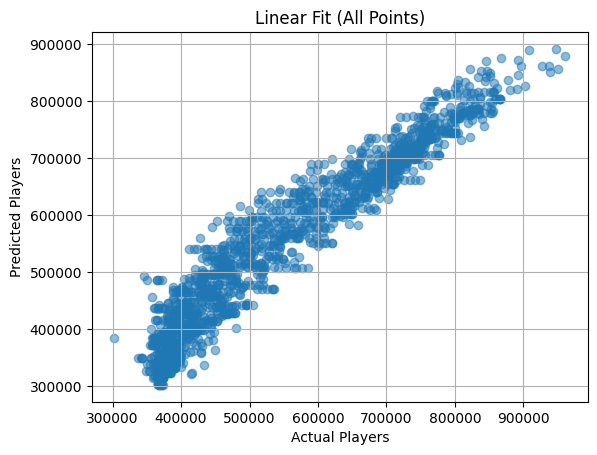

In [14]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df_game.drop(columns=["game_name", "date", "time", "datetime", "players", "release_date", "hour"])
y = df_game["players"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Players")
plt.ylabel("Predicted Players")
plt.title("Linear Fit (All Points)")
plt.grid(True)
plt.show()

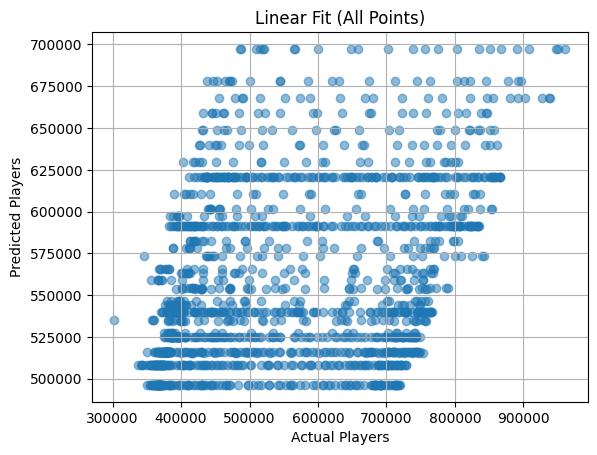

In [11]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df_game.drop(columns=["game_name", "date", "time", "datetime", "players", "release_date", "hour", "hour_sin","hour_cos"])
y = df_game["players"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Players")
plt.ylabel("Predicted Players")
plt.title("Linear Fit (All Points)")
plt.grid(True)
plt.show()

In [15]:
from datetime import datetime
target_time = datetime(2025, 10, 15, 12, 0, 0)

pred = predict_player_count(
    model,
    game_name="Dota 2",
    target_datetime=target_time,
    game_csv="data/game.csv",
    weekend_csv="data/weekend.csv"
)

🎮 Predicted player count for Dota 2 at 2025-10-15 12:00:00: 619,999
